In [80]:
##import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv('/Users/xlade/Desktop/Amdari/Internship/Project_3/monthly_sales_data (1) - monthly_sales_data (1).csv')
df

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0
...,...,...,...,...,...,...,...,...
259,RPG,2023-08-01,132693,2023,1,PC,0,0
260,Simulation,2023-09-01,143373,2023,4,Nintendo,0,0
261,Simulation,2023-10-01,126410,2023,6,Nintendo,0,1
262,Simulation,2023-11-01,91200,2023,2,Nintendo,0,0


In [82]:
## check for missing values 

df.isnull().sum()

Category         0
Month            0
Monthly Sales    0
Year             0
DayOfWeek        0
Platform         0
Holiday          0
Promotion        0
dtype: int64

In [83]:
## check for duplicated rows
df.duplicated().sum()

0

In [84]:
#Know the dataset shape
df.shape

(264, 8)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


In [86]:
#observe the statistics of the numerical features 
df.describe()

,Monthly Sales,Year,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112349.003788,2012.500000,3.011364,0.166667,0.204545
std,34144.606185,6.356339,1.995209,0.373386,0.404135
min,10469.000000,2002.000000,0.000000,0.000000,0.000000
25%,88873.750000,2007.000000,1.000000,0.000000,0.000000
50%,112947.500000,2012.500000,3.000000,0.000000,0.000000
75%,135193.500000,2018.000000,5.000000,0.000000,0.000000
max,206596.000000,2023.000000,6.000000,1.000000,1.000000


In [87]:
# check number of unique values in category
df["Category"].value_counts()

Category
Sports        59
Adventure     55
RPG           52
Simulation    51
FPS           47
Name: count, dtype: int64

In [88]:
# check number of unique values in platform
df["Platform"].value_counts()

Platform
Xbox           76
Nintendo       69
PC             61
PlayStation    58
Name: count, dtype: int64

## Univariate Analysis

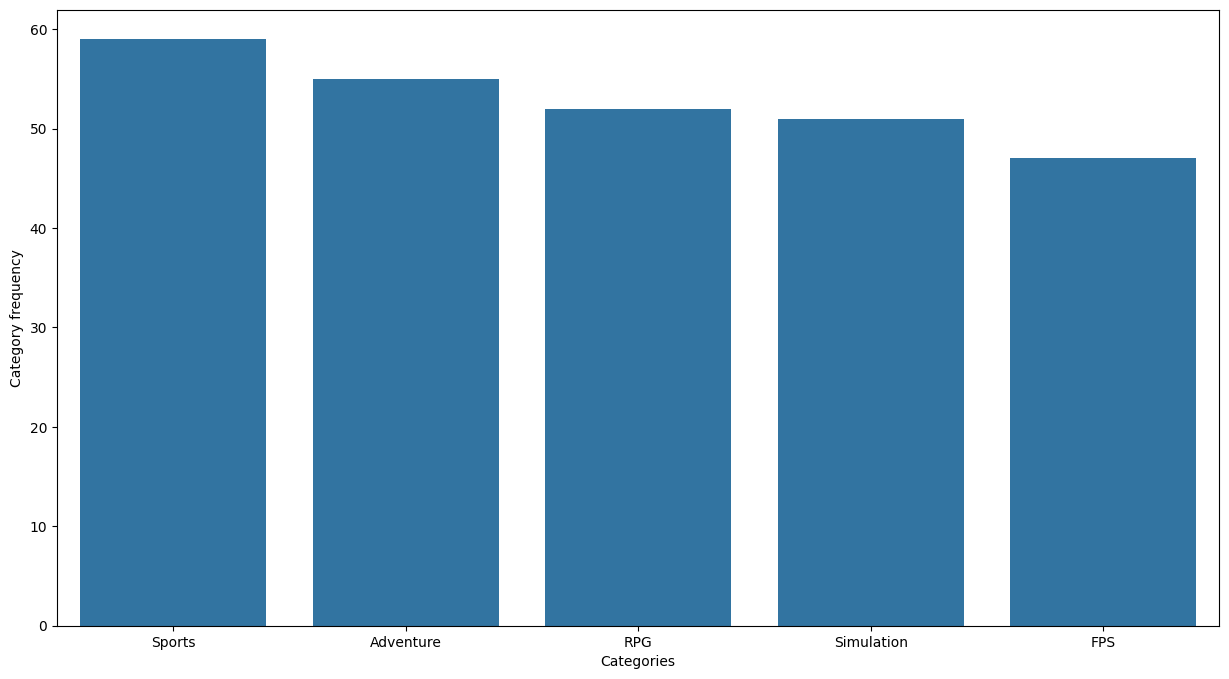

In [89]:
## category count plot

category_order = df["Category"].value_counts().index.tolist()


plt.figure(figsize = (15, 8))


sns.countplot(data = df, x = "Category", order= category_order)

plt.xlabel("Categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

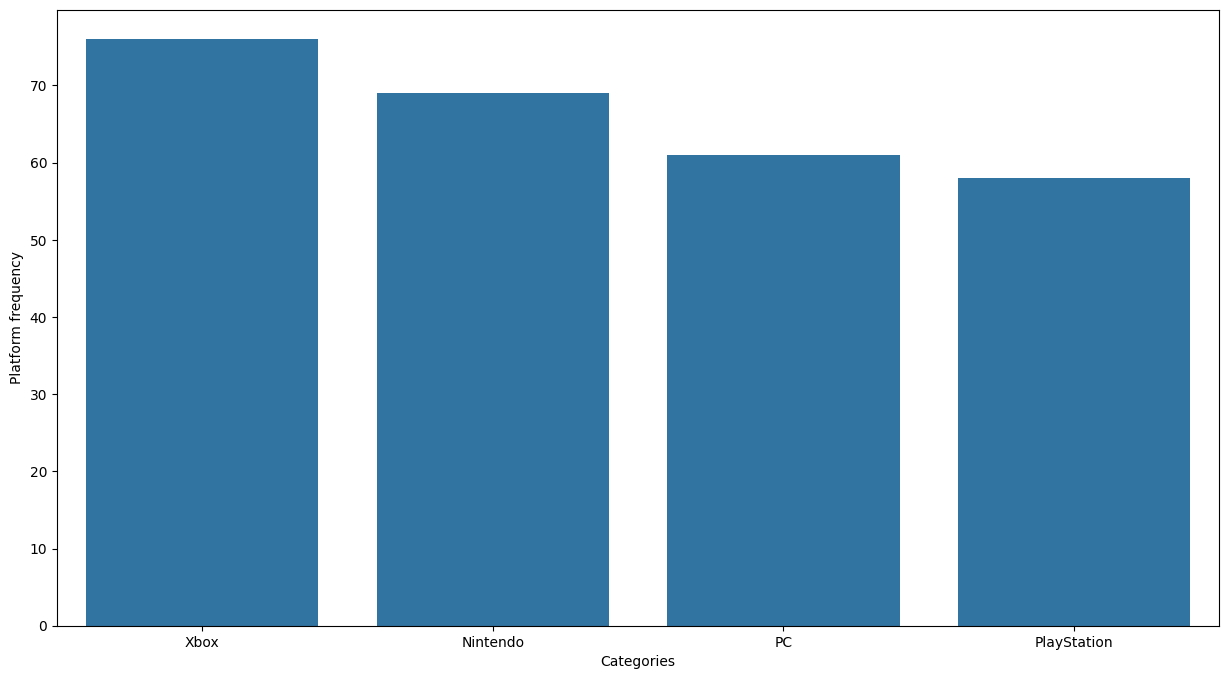

In [90]:
## platform count plot

platform_order = df["Platform"].value_counts().index.tolist()

plt.figure(figsize = (15, 8))

sns.countplot(data = df, x = "Platform", order= platform_order)

plt.xlabel("Categories")
plt.ylabel("Platform frequency")

plt.show(); plt.close()

<Axes: xlabel='Monthly Sales'>

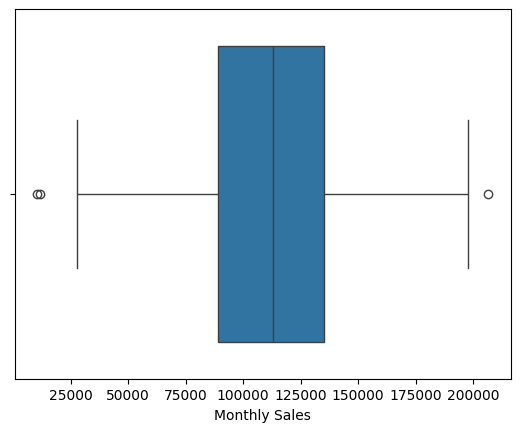

In [91]:
# check for outliers in Monthly Sales
sns.boxplot(x=df["Monthly Sales"])

## Bivariate Analysis

In [92]:
## Extract month from date column


df["Month"] = pd.to_datetime(df["Month"])
df["Month_Cat"] = df["Month"].dt.month

In [93]:
df.head(5)

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Cat
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0,1
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0,2
2,Sports,2002-03-01,114777,2002,4,PC,0,0,3
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0,4
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0,5


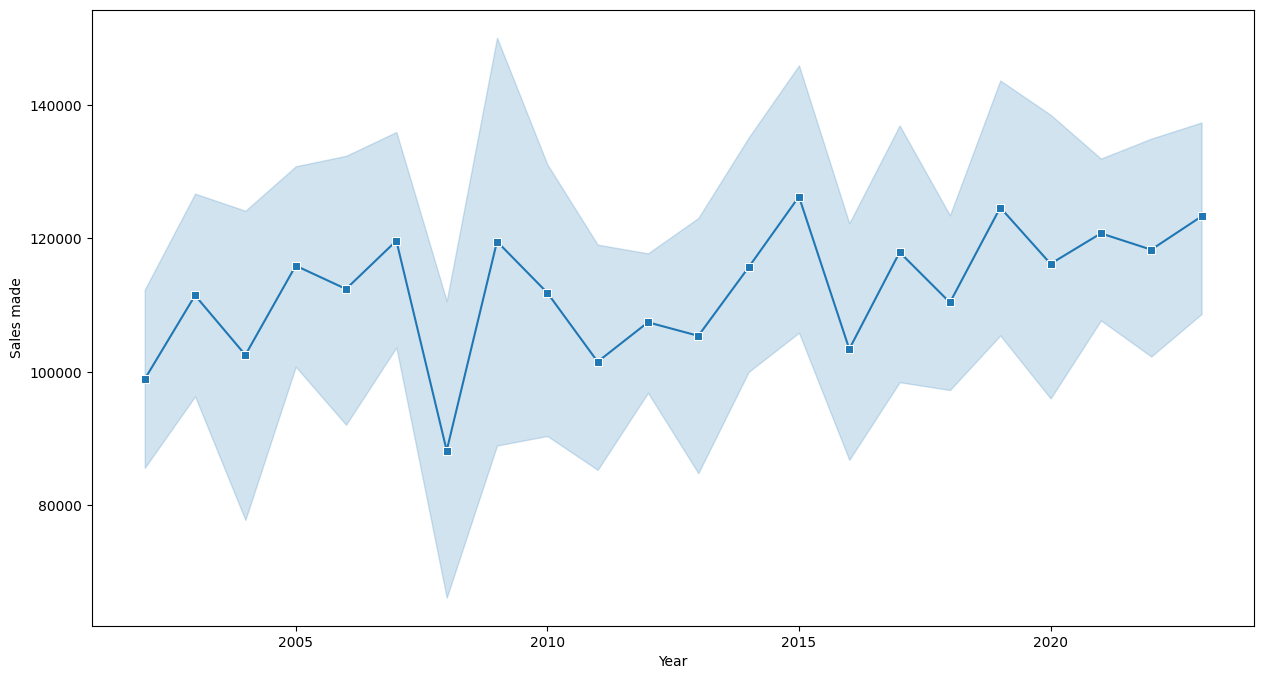

In [ ]:
## visualize sales trend by year

plt.figure(figsize = (15, 8))

sns.lineplot(data = df, x = "Year", y = "Monthly Sales", marker = "s")

plt.xlabel("Year")
plt.ylabel("Sales made")

plt.show(); plt.close()

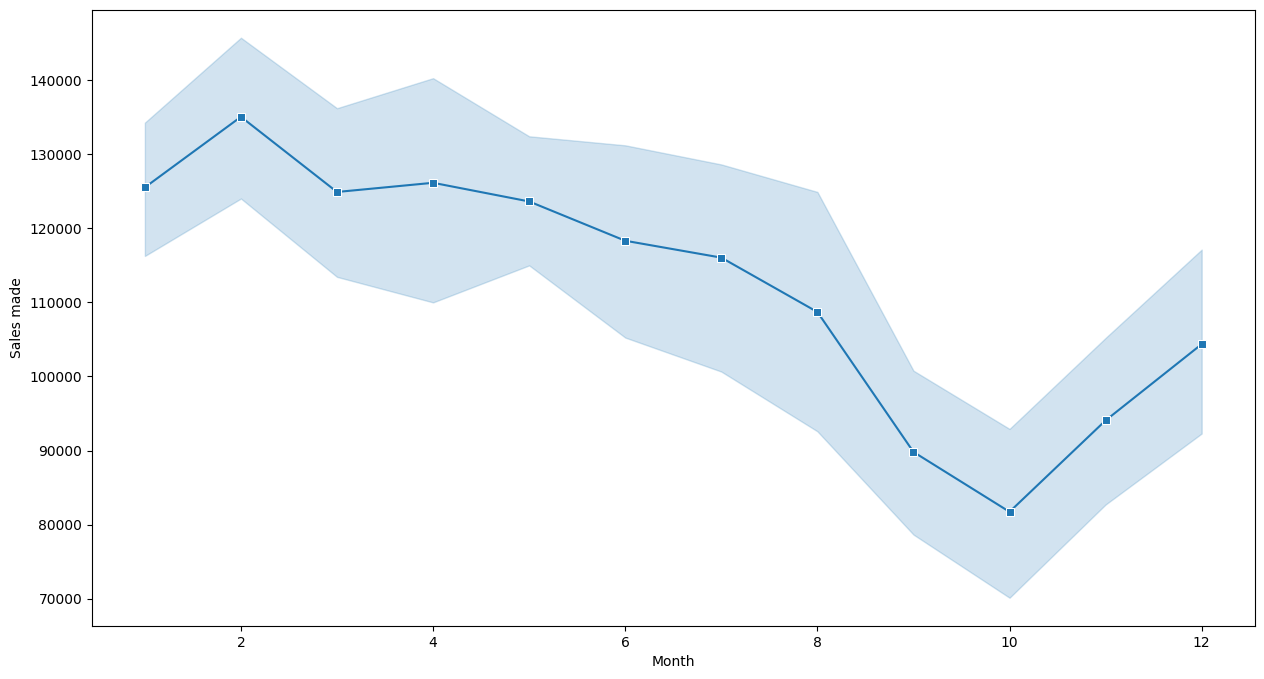

In [ ]:
## visualize sales trend by month

plt.figure(figsize = (15, 8))

sns.lineplot(data = df, x = "Month_Cat", y = "Monthly Sales", marker = "s")

plt.xlabel("Month")
plt.ylabel("Sales made")

plt.show(); plt.close()

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
## set month as the dataset index for time series operation
df.set_index('Month', inplace=True)

In [109]:
df["Monthly Sales"].values

array([108592, 129387, 114777,  71738, 142512, 100567,  63758,  82688,
       123310,  96191,  67980,  85358, 101263, 178291, 124843, 124041,
       144445, 123456, 103597,  90554,  77052,  70480, 101181,  98307,
       133804, 114479, 116656,  52107, 141939, 127599, 142221,  10469,
       142764,  68321, 113510,  66464, 131120,  86211,  96497, 170386,
       109641, 124640, 139295, 113140,  85538,  84370, 153280,  96845,
       119683, 150245, 149288, 149489, 135436,  84740, 163109,  64792,
        91017,  51706,  80165, 109349, 124203, 132296, 165446, 128396,
       109862, 148865, 150703,  63266, 100772,  96282,  74075, 141670,
       110973, 124318, 112755, 116170,  85211,  77653, 163766,  75598,
        54021,  11557,  64746,  61619, 165648, 151758,  98215, 184189,
       148465, 112023,  41861, 170648,  42988,  27710, 115504, 175416,
       158828, 139293, 137615, 143130, 142692, 131116, 120882, 100954,
        62969,  69564,  34951, 100186,  88555,  90181, 126082, 160201,
      

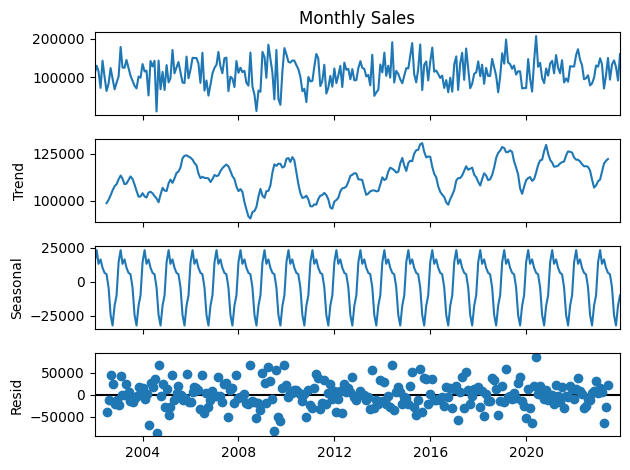

In [111]:
## Visualize seasonal decomposition

decomposition = seasonal_decompose(df['Monthly Sales'], model='additive', period=12)
fig = decomposition.plot()
plt.show()


In [103]:
# Trend, Seasonal, and Residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

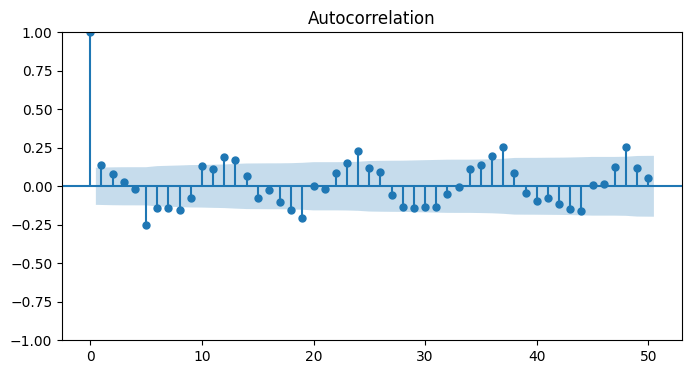

In [112]:
## Autocorrelation Plot 
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(df['Monthly Sales'], ax=ax, lags=50)
plt.show()

In [114]:
# Extract month name from the DateTimeIndex
seasonal_df = df.copy()
seasonal_df['Month'] = seasonal_df.index.month_name()
seasonal_df['Year'] = seasonal_df.index.year

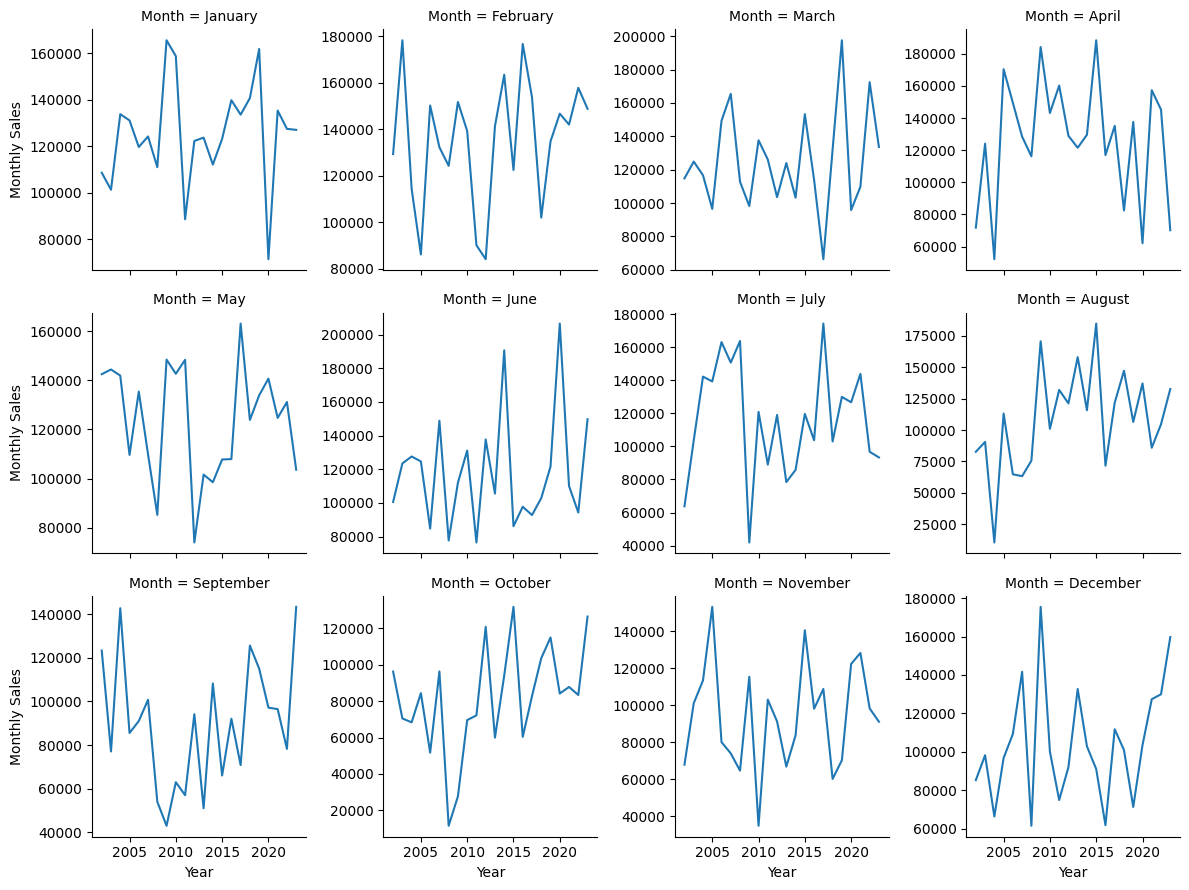

In [118]:
# Create a facet grid of line plots, one per month, showing values across years
g = sns.FacetGrid(seasonal_df, col='Month', col_wrap=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Monthly Sales')
plt.show()


In [96]:
df.head(5)

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Cat
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0,1
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0,2
2,Sports,2002-03-01,114777,2002,4,PC,0,0,3
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0,4
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0,5
